# Notebook Preparation

In [ ]:
!pip install squarify

In [ ]:
!pip install pandas statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency

Data Origin: [Kaggle](https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset)

In [ ]:
df = pd.read_csv('imdb_movies.csv')

df.sample(3)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
4234,Play Motel,01/01/1979,52.0,"Crime, Thriller, Romance",The motel has a special room designed for sexu...,"Ray Lovelock, Roberto Vinci, Anna Maria Rizzol...",Play Motel,Released,Italian,105600000.0,474838857.0,IT
1667,Once Upon a Time… in Hollywood,08/15/2019,74.0,"Comedy, Drama, Thriller","Los Angeles, 1969. TV star Rick Dalton, a stru...","Leonardo DiCaprio, Rick Dalton, Brad Pitt, Cli...",Once Upon a Time… in Hollywood,Released,English,95000000.0,374251247.0,AU
3849,The Ugly Truth,08/06/2009,65.0,"Comedy, Romance",A romantically challenged morning show produce...,"Katherine Heigl, Abby, Gerard Butler, Mike Cha...",The Ugly Truth,Released,English,38000000.0,205298907.0,AU


We're going to remove the 'overview', 'crew', and 'orig_title' as we're not going to use it in this analysis.

In [ ]:
df.drop(['overview', 'crew', 'orig_title'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   names      10178 non-null  object 
 1   date_x     10178 non-null  object 
 2   score      10178 non-null  float64
 3   genre      10093 non-null  object 
 4   status     10178 non-null  object 
 5   orig_lang  10178 non-null  object 
 6   budget_x   10178 non-null  float64
 7   revenue    10178 non-null  float64
 8   country    10178 non-null  object 
dtypes: float64(3), object(6)
memory usage: 715.8+ KB


In [ ]:
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


# Missing and Duplicate Values

In [ ]:
# Missing Values
df.isna().sum()

names         0
date_x        0
score         0
genre        85
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

There's only a little bit of missing values in the dataset. We're just going to drop it.

In [ ]:
df.dropna(inplace=True)

df.isna().sum()

names        0
date_x       0
score        0
genre        0
status       0
orig_lang    0
budget_x     0
revenue      0
country      0
dtype: int64

It's all good now.

In [ ]:
if df.duplicated().sum() != 0:
    print(f"There's {df.duplicated().sum()} rows that are duplicated")
else:
    print(f"There's no duplicate values in the dataset")

There's no duplicate values in the dataset


# Feature Extraction

## Genres

In [ ]:
df['genre'].head(5)

0                                    Drama, Action
1               Science Fiction, Adventure, Action
2    Animation, Adventure, Family, Fantasy, Comedy
3    Animation, Comedy, Family, Adventure, Fantasy
4                                           Action
Name: genre, dtype: object

In the genre column, we observe multiple values within a single row. To enhance our analysis, we will extract these values, create binary columns indicating whether the movie belongs to each genre, and additionally capture the count of genres associated with each movie.

In [ ]:
# Get the unique genres list

# Convert genre to list
genres_list = df['genre'].tolist()

# Separate genres in each string
separated_genres = [genre.replace('\xa0', '').split(', ') for genre in genres_list]
all_genres = [genre for sublist in separated_genres for genre in sublist]
formatted_genres = [f"{genre}" for genres in all_genres for genre in genres.split(',')]

# Loop through the list and save unique values
unique_genres = []

for genre in formatted_genres:
    if genre not in unique_genres:
        unique_genres.append(genre)

print("Original Genres List:")
print(genres_list[:20])
print("\nStep 1:")
print(separated_genres[:20])
print("\nStep 2:")
print(all_genres[:20])
print("\nStep 3:")
print(formatted_genres[:20])
print("\nResult (Unique Genres List):")
print(unique_genres)

Original Genres List:
['Drama,\xa0Action', 'Science Fiction,\xa0Adventure,\xa0Action', 'Animation,\xa0Adventure,\xa0Family,\xa0Fantasy,\xa0Comedy', 'Animation,\xa0Comedy,\xa0Family,\xa0Adventure,\xa0Fantasy', 'Action', 'Thriller,\xa0Comedy,\xa0Crime', 'Action,\xa0Thriller,\xa0Crime', 'Animation,\xa0Family,\xa0Fantasy,\xa0Adventure,\xa0Comedy', 'Action,\xa0Science Fiction', 'Action,\xa0Drama,\xa0Horror,\xa0Science Fiction,\xa0Thriller', 'Horror,\xa0Thriller', 'Horror', 'Comedy,\xa0Mystery,\xa0Action', 'Action,\xa0Adventure,\xa0Science Fiction', 'Horror,\xa0Mystery', 'Drama,\xa0History', 'Thriller,\xa0Mystery,\xa0Horror,\xa0Fantasy', 'Horror,\xa0Thriller', 'Thriller', 'War,\xa0Action,\xa0Adventure,\xa0Thriller']

Step 1:
[['Drama,Action'], ['Science Fiction,Adventure,Action'], ['Animation,Adventure,Family,Fantasy,Comedy'], ['Animation,Comedy,Family,Adventure,Fantasy'], ['Action'], ['Thriller,Comedy,Crime'], ['Action,Thriller,Crime'], ['Animation,Family,Fantasy,Adventure,Comedy'], ['Actio

In [ ]:
# Add new binary columns
for genre in unique_genres:
    df[f'genre_{genre}'] = df['genre'].apply(lambda x: 1 if genre in x else 0)

df.sample(3)

,names,date_x,score,genre,status,orig_lang,budget_x,revenue,country,genre_Drama,...,genre_Crime,genre_Horror,genre_Mystery,genre_History,genre_War,genre_Documentary,genre_Romance,genre_Music,genre_Western,genre_TV Movie
557,Super Mario Bros: This Ain't No Video Game,11/03/2014,34.0,Documentary,Released,English,54640000.0,329856760.8,GB,0,...,0,0,0,0,0,1,0,0,0,0
3204,Robin Hood,02/01/2019,59.0,"Adventure, Action, Thriller",Released,English,210000000.0,322459006.0,AU,0,...,0,0,0,0,0,0,0,0,0,0
7620,Stagecoach,03/03/1939,77.0,"Western, Adventure, Action, Drama, Romance",Released,English,531374.0,1103757.0,US,1,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df.columns

Index(['names', 'date_x', 'score', 'genre', 'status', 'orig_lang', 'budget_x',
       'revenue', 'country', 'genre_Drama', 'genre_Action',
       'genre_Science Fiction', 'genre_Adventure', 'genre_Animation',
       'genre_Family', 'genre_Fantasy', 'genre_Comedy', 'genre_Thriller',
       'genre_Crime', 'genre_Horror', 'genre_Mystery', 'genre_History',
       'genre_War', 'genre_Documentary', 'genre_Romance', 'genre_Music',
       'genre_Western', 'genre_TV Movie'],
      dtype='object')

In [ ]:
# Add column that shows how many genres does the movie have
df['cnt_genres'] = df[['genre_Drama', 'genre_Action', 'genre_Science Fiction', 'genre_Adventure',
                       'genre_Animation', 'genre_Family', 'genre_Fantasy', 'genre_Comedy',
                       'genre_Thriller', 'genre_Crime', 'genre_Horror', 'genre_Mystery',
                       'genre_History', 'genre_War', 'genre_Documentary', 'genre_Romance',
                       'genre_Music', 'genre_Western', 'genre_TV Movie']].sum(axis=1)

df.sample(3)

,names,date_x,score,genre,status,orig_lang,budget_x,revenue,country,genre_Drama,...,genre_Horror,genre_Mystery,genre_History,genre_War,genre_Documentary,genre_Romance,genre_Music,genre_Western,genre_TV Movie,cnt_genres
2014,The Japanese Wife Next Door: Part 2,06/25/2004,63.0,Comedy,Released,Japanese,110000000.0,271669045.6,JP,0,...,0,0,0,0,0,0,0,0,0,1
5832,Live and Let Die,08/01/1973,65.0,"Adventure, Action, Thriller",Released,English,7000000.0,161800000.0,AU,0,...,0,0,0,0,0,0,0,0,0,3
6911,Sixteen Candles,12/13/1984,68.0,"Comedy, Romance",Released,English,6500000.0,23686027.0,AU,0,...,0,0,0,0,0,1,0,0,0,2


In [ ]:
# Drop genre column
df.drop('genre', axis=1, inplace=True)

df.columns

Index(['names', 'date_x', 'score', 'status', 'orig_lang', 'budget_x',
       'revenue', 'country', 'genre_Drama', 'genre_Action',
       'genre_Science Fiction', 'genre_Adventure', 'genre_Animation',
       'genre_Family', 'genre_Fantasy', 'genre_Comedy', 'genre_Thriller',
       'genre_Crime', 'genre_Horror', 'genre_Mystery', 'genre_History',
       'genre_War', 'genre_Documentary', 'genre_Romance', 'genre_Music',
       'genre_Western', 'genre_TV Movie', 'cnt_genres'],
      dtype='object')

## Date

In [ ]:
df['date_x'].head(3)

0    03/02/2023 
1    12/15/2022 
2    04/05/2023 
Name: date_x, dtype: object

In [ ]:
# Split 'date_x' column into day, month, and year
df[['month', 'day', 'year']] = df['date_x'].str.split('/', expand=True)

df[['month', 'day', 'year']].head(3)

,month,day,year
0,03,02,2023
1,12,15,2022
2,04,05,2023


We will categorize the days of the month into the beginning, middle, and end segments of the month.
* Beginning: Days 1 to 10
* Middle: Days 11 to 20
* End: Days 21 to the last day of the month

In [ ]:
df['day'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10093 entries, 0 to 10177
Series name: day
Non-Null Count  Dtype 
--------------  ----- 
10093 non-null  object
dtypes: object(1)
memory usage: 157.7+ KB


In [ ]:
# Convert day column to numerical
df['day'] = pd.to_numeric(df['day'], errors='coerce')

df['day_group'] = pd.cut(df['day'], bins=[0, 10, 20, 31], labels=['Beginning', 'Middle', 'End'])

# Remove day column
df.drop('day', axis=1, inplace=True)

df['day_group'].sample(5)

4480    Beginning
3138    Beginning
6727    Beginning
7528    Beginning
8846          End
Name: day_group, dtype: category
Categories (3, object): ['Beginning' < 'Middle' < 'End']

In [ ]:
print(f"The oldest movie year in the dataset: {df['year'].min()}")
print(f"The newest movie year in the dataset: {df['year'].max()}")

The oldest movie year in the dataset: 1903 
The newest movie year in the dataset: 2023 


The dataset spans a period of 120 years, prompting us to categorize the movies by decade and drop the year column.

In [ ]:
df['year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10093 entries, 0 to 10177
Series name: year
Non-Null Count  Dtype 
--------------  ----- 
10093 non-null  object
dtypes: object(1)
memory usage: 157.7+ KB


In [ ]:
# Convert year column to numerical
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Create a new column 'decade' to represent the decade each movie was released
df['decade'] = (df['year'] // 10) * 10

df[['year', 'decade']].sample(10)

,year,decade
6658,1999,1990
8930,2012,2010
9694,1980,1980
4527,2018,2010
2222,2016,2010
7398,2019,2010
7327,1995,1990
229,2023,2020
5543,2021,2020
1985,1968,1960


In [ ]:
# Drop year and date_x columns
df.drop(['year', 'date_x'], axis=1, inplace=True)

# Separating Numerical, Categorical, and Binary Columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10093 entries, 0 to 10177
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   names                  10093 non-null  object  
 1   score                  10093 non-null  float64 
 2   status                 10093 non-null  object  
 3   orig_lang              10093 non-null  object  
 4   budget_x               10093 non-null  float64 
 5   revenue                10093 non-null  float64 
 6   country                10093 non-null  object  
 7   genre_Drama            10093 non-null  int64   
 8   genre_Action           10093 non-null  int64   
 9   genre_Science Fiction  10093 non-null  int64   
 10  genre_Adventure        10093 non-null  int64   
 11  genre_Animation        10093 non-null  int64   
 12  genre_Family           10093 non-null  int64   
 13  genre_Fantasy          10093 non-null  int64   
 14  genre_Comedy           10093 non-null 

In [ ]:
# Functions for separating columns according to the type
def separate_columns_by_type(df):
    binary_cols = []
    numerical_cols = []
    categorical_cols = []

    for col in df.columns:
        if df[col].nunique() == 2:
            binary_cols.append(col)
        elif df[col].dtype in ['int64', 'float64']:
            numerical_cols.append(col)
        elif df[col].dtype in ['object', 'category']:
            categorical_cols.append(col)

    return binary_cols, numerical_cols, categorical_cols

In [ ]:
binary, nums, cats = separate_columns_by_type(df)

# Drop names from categorical list
cats = [col for col in cats if col != 'names']

# Move decade column to categorical list
cats = cats + ['decade']
nums = [col for col in nums if col != 'decade']

In [ ]:
print(f"Binary Features: {binary}")
print(f"\nNumerical Features: {nums}")
print(f"\nCategorical Features: {cats}")

Binary Features: ['genre_Drama', 'genre_Action', 'genre_Science Fiction', 'genre_Adventure', 'genre_Animation', 'genre_Family', 'genre_Fantasy', 'genre_Comedy', 'genre_Thriller', 'genre_Crime', 'genre_Horror', 'genre_Mystery', 'genre_History', 'genre_War', 'genre_Documentary', 'genre_Romance', 'genre_Music', 'genre_Western', 'genre_TV Movie']

Numerical Features: ['score', 'budget_x', 'revenue', 'cnt_genres']

Categorical Features: ['status', 'orig_lang', 'country', 'month', 'day_group', 'decade']


# Univariate Analysis

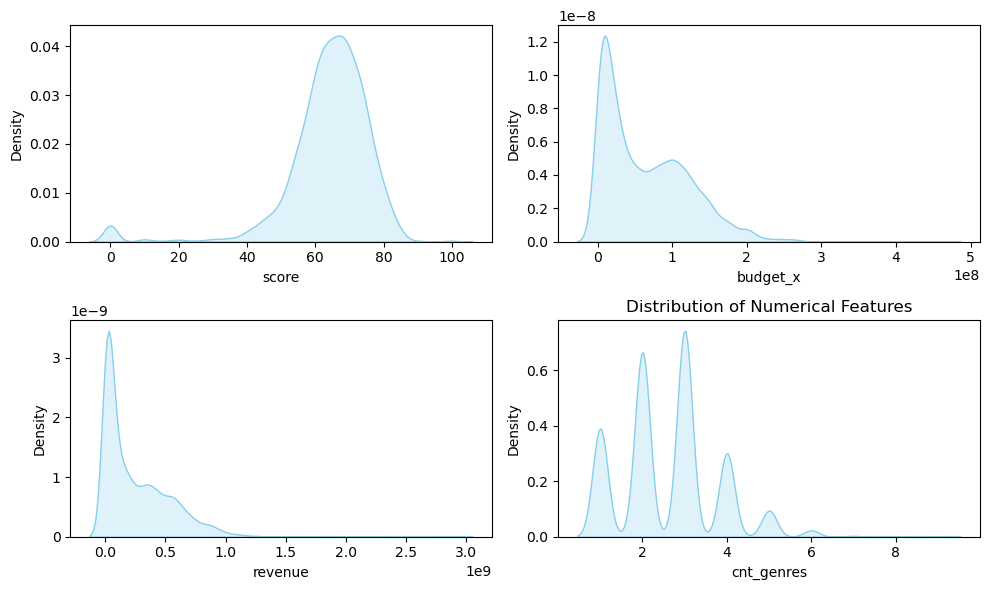

In [ ]:
# Set up the subplot grid
num_features = len(nums)
num_rows = (num_features + 1) // 2
num_cols = 2

# Initialize the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 3))

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i in range(num_features):
    # Use i-th subplot
    sns.kdeplot(data=df, x=nums[i], color='skyblue', ax=axs[i], fill=True)

# Remove empty subplot if the number of features is odd
if num_features % 2 != 0:
    fig.delaxes(axs[-1])

plt.title('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

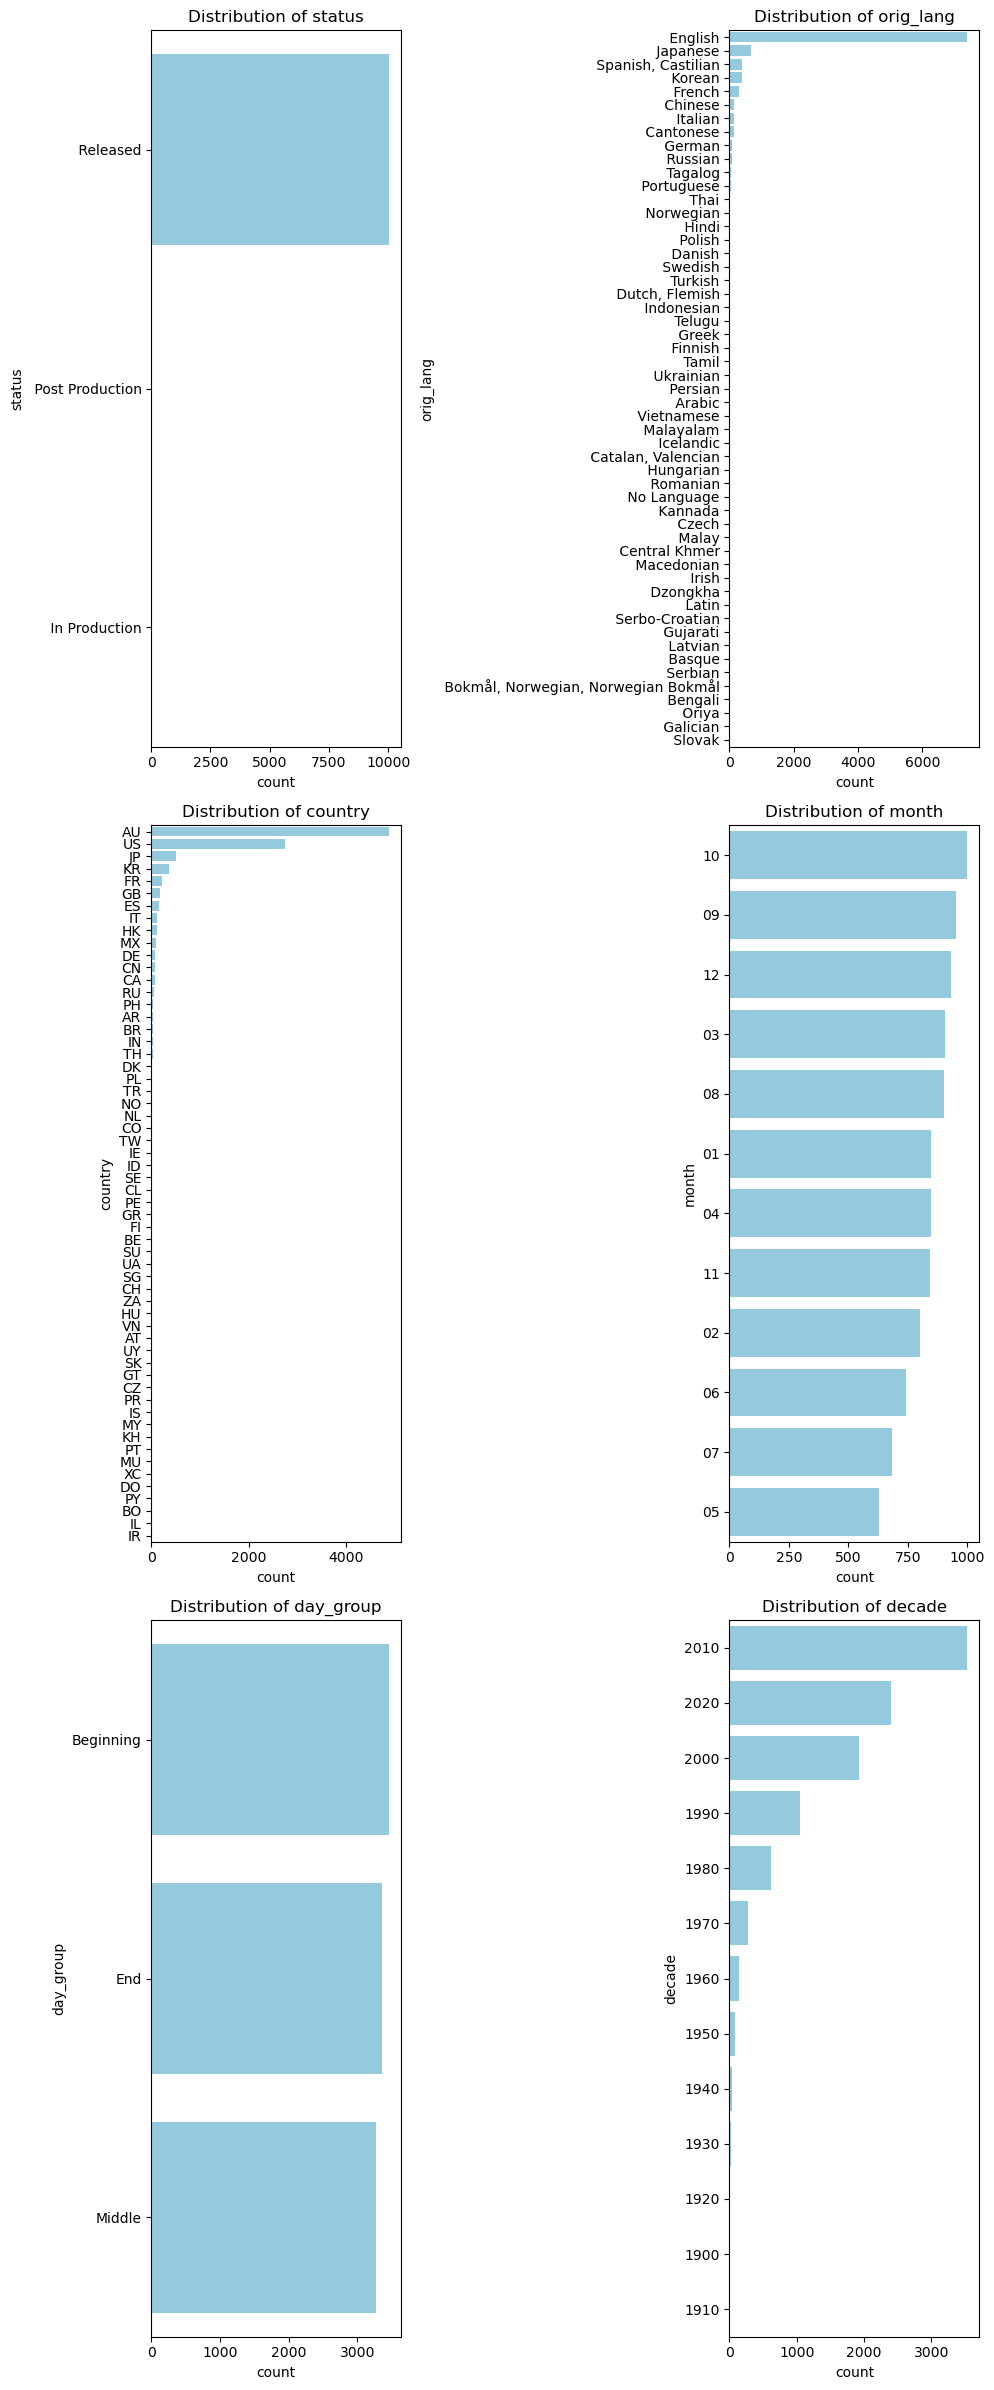

In [ ]:
# Set up the subplot grid
cat_features = len(cats)
cat_rows = (cat_features + 1) // 2
cat_cols = 2

# Initialize the subplot grid
fig, axs = plt.subplots(cat_rows, cat_cols, figsize=(10, cat_rows * 8))

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i in range(cat_features):
    # Use i-th subplot
    sns.countplot(data=df, y=cats[i], color='skyblue', ax=axs[i], orient='h', order=df[cats[i]].value_counts().index)
    axs[i].set_title(f"Distribution of {cats[i]}")

# Remove empty subplot if the number of features is odd
if cat_features % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

* In our dataset, there are movies categorized as both 'Post Production' and 'In Production,'prompting us to conduct a more in-depth analysis of this particular column.
* It is evident that the predominant language used in almost every movie within the dataset is English.
* Australia takes the lead in contributing the majority of movies, followed by the USA, although the latter falls just short of surpassing the halfway mark.
* The release distribution across months and days exhibits a well-distributed pattern.
* While the majority of movies in our dataset belong to the 2010s era, an intriguing pattern emerges. Despite spanning only three years, the number of movies released in the 2020s is nearly half that of the 2010s, suggesting a surge in movie releases during the 2020s.

In [ ]:
# Extract the columns related to genres
genre_df = df[binary]

# Sum the counts for each genre
genre_df = np.sum(genre_df, axis=0)

# Convert the 1D array to a DataFrame with 'genre' as the index and 'count' as the column
genre_df = pd.DataFrame(genre_df).reset_index()

# Rename the columns to 'genre' and 'count'
genre_df.columns = ['genre', 'count']

# Remove the 'genre_' prefix from the values in the 'genre' column
genre_df['genre'] = genre_df['genre'].str.replace('genre_', '')

# Display the final DataFrame with genres and their corresponding counts
genre_df.sort_values(by='count', ascending=False, inplace=True)

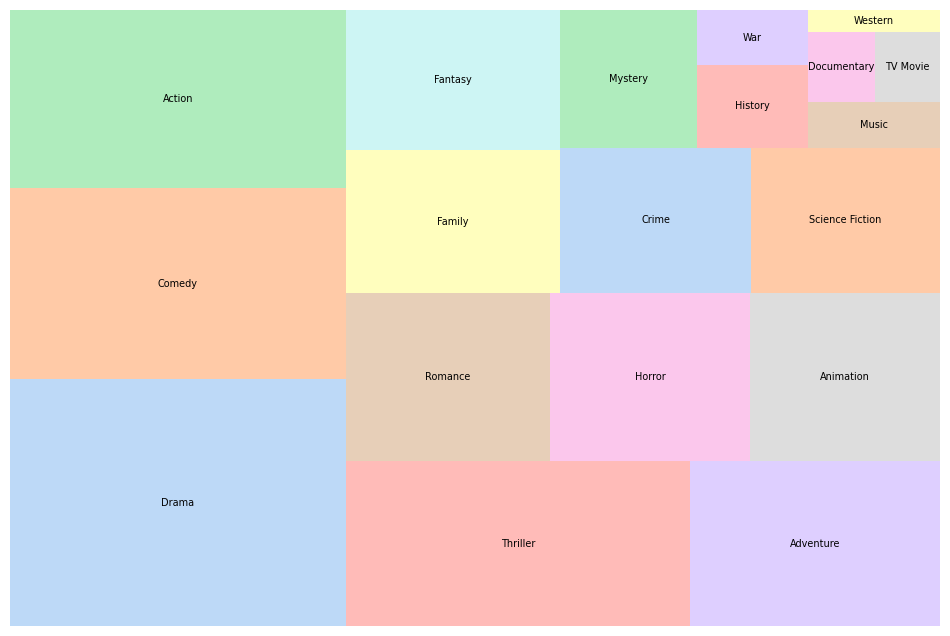

In [ ]:
plt.figure(figsize=(12,8))

sizes = genre_df['count']
labels = genre_df['genre']

# Define a custom color palette
custom_palette = sns.color_palette('pastel')

# Create a treemap with the custom color palette
squarify.plot(sizes=sizes, label=labels, color=custom_palette, alpha=0.7, text_kwargs={'fontsize': 7})
plt.axis('off')
plt.show()

The dataset primarily features movies across a diverse range of genres, including drama, comedy, action, thriller, and adventure.

# Data Cleaning

## Status Column

In [ ]:
df['status'].unique()

array([' Released', ' Post Production', ' In Production'], dtype=object)

In [ ]:
post_prod = df[df['status'] == ' Post Production']

in_prod = df[df['status'] == ' In Production']

print(f"Score of post production movies: {post_prod['score'].value_counts()}")
print(f"Score of in production movies: {in_prod['score'].value_counts()}")

Score of post production movies: 0.0    30
Name: score, dtype: int64
Score of in production movies: 0.0    15
Name: score, dtype: int64


These movies still have 0 score. We're just going to drop rows that have these statuses. We're also going to drop the status column as it is not relevant for our analysis.

In [ ]:
df = df[~df['status'].isin([' Post Production', ' In Production'])]

print(df[df['status'].isin([' Post Production', ' In Production'])])

df.drop('status', axis=1, inplace=True)

df.columns

Empty DataFrame
Columns: [names, score, status, orig_lang, budget_x, revenue, country, genre_Drama, genre_Action, genre_Science Fiction, genre_Adventure, genre_Animation, genre_Family, genre_Fantasy, genre_Comedy, genre_Thriller, genre_Crime, genre_Horror, genre_Mystery, genre_History, genre_War, genre_Documentary, genre_Romance, genre_Music, genre_Western, genre_TV Movie, cnt_genres, month, day_group, decade]
Index: []

[0 rows x 30 columns]


Index(['names', 'score', 'orig_lang', 'budget_x', 'revenue', 'country',
       'genre_Drama', 'genre_Action', 'genre_Science Fiction',
       'genre_Adventure', 'genre_Animation', 'genre_Family', 'genre_Fantasy',
       'genre_Comedy', 'genre_Thriller', 'genre_Crime', 'genre_Horror',
       'genre_Mystery', 'genre_History', 'genre_War', 'genre_Documentary',
       'genre_Romance', 'genre_Music', 'genre_Western', 'genre_TV Movie',
       'cnt_genres', 'month', 'day_group', 'decade'],
      dtype='object')

In [ ]:
# Drop from the categorical list
cats = [col for col in cats if col != 'status']

## Language

In [ ]:
# Only get the top 5 language used and label the rest as others
language_df = pd.DataFrame(df['orig_lang'].value_counts()).reset_index()
language_df.columns = ['language', 'count']

language_df[:5]

,language,count
0,English,7360
1,Japanese,680
2,"Spanish, Castilian",392
3,Korean,385
4,French,284


In [ ]:
top_5_langs = language_df['language'][:5].to_list()

def g(df):
    df['orig_lang'] = df['orig_lang'].apply(lambda x: x if x in top_5_langs else 'Others')
    return df

df = g(df.copy())

df = pd.DataFrame(df).reset_index()
df['orig_lang'].unique()

array([' English', ' Spanish, Castilian', 'Others', ' Japanese',
       ' Korean', ' French'], dtype=object)

## Country

In [ ]:
# Only get the top 5 countries and label the rest as others
country_df = pd.DataFrame(df['country'].value_counts()).reset_index()
country_df.columns = ['country', 'count']

country_df[:5]

,country,count
0,AU,4878
1,US,2703
2,JP,505
3,KR,359
4,FR,221


In [ ]:
top_5_country = country_df['country'][:5].to_list()

def g(df):
    df['country'] = df['country'].apply(lambda x: x if x in top_5_country else 'Others')
    return df

df = g(df.copy())

df = pd.DataFrame(df).reset_index()
df['country'].unique()

array(['AU', 'US', 'Others', 'KR', 'JP', 'FR'], dtype=object)

## Handling Outliers

In [ ]:
df[nums].skew()

score        -2.224308
budget_x      0.857213
revenue       1.516581
cnt_genres    0.519657
dtype: float64

In [ ]:
len_before = len(df)

threshold = 3

# Print length before handling outliers
print("Length before handling outliers:")
print(len(df))

# Loop through each column
for column in nums:
    # Calculate Z-scores
    z_scores = stats.zscore(df[column])

    # Identify outliers
    outliers = (abs(z_scores) > threshold)

    # Filter out outliers
    df = df[~outliers]

# Print length after handling outliers
print("\nLength after handling outliers:")
print(len(df))

# Calculate the percentage reduction
percentage_reduction = ((len_before - len(df)) / len_before) * 100
print(f"\nPercentage reduction: {percentage_reduction:.2f}%")

Length before handling outliers:
10048

Length after handling outliers:
9724

Percentage reduction: 3.22%


In [ ]:
df[nums].skew()

score        -0.523664
budget_x      0.648408
revenue       0.969436
cnt_genres    0.432904
dtype: float64

In [ ]:
# Check 0 values in the numerical columns
for col in nums:
    if len(df[df[col] == 0]) != 0:
        print(f"There are 0 values in {col} column.")

There are 0 values in revenue column.


We'll drop rows with 0 revenue.

In [ ]:
df = df[df['revenue'] != 0]

In [ ]:
df[df['revenue'] == 0]

,level_0,index,names,score,orig_lang,budget_x,revenue,country,genre_Drama,genre_Action,...,genre_War,genre_Documentary,genre_Romance,genre_Music,genre_Western,genre_TV Movie,cnt_genres,month,day_group,decade


In [ ]:
from scipy.stats import boxcox

for col in nums:
    df[col], _ = boxcox(df[col])

df[nums].skew()

score        -0.019352
budget_x     -0.216375
revenue      -0.225217
cnt_genres   -0.053120
dtype: float64

The data is no longer highly skewed.

## Handling Imbalance Categorical Data

In [ ]:
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9652 entries, 0 to 10047
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   orig_lang  9652 non-null   object  
 1   country    9652 non-null   object  
 2   month      9652 non-null   object  
 3   day_group  9652 non-null   category
 4   decade     9652 non-null   int64   
dtypes: category(1), int64(1), object(3)
memory usage: 386.6+ KB


In [ ]:
# Change decade data type to object
df['decade'] = df['decade'].astype('object')

for col in cats:
    print(f"{col}:\n{df[col].value_counts()}\n")

orig_lang:
 English               7150
Others                  877
 Japanese               651
 Spanish, Castilian     376
 Korean                 321
 French                 277
Name: orig_lang, dtype: int64

country:
AU        4756
US        2624
Others    1279
JP         482
KR         295
FR         216
Name: country, dtype: int64

month:
10    978
09    930
12    900
08    869
03    862
01    817
11    816
02    780
04    746
06    699
07    653
05    602
Name: month, dtype: int64

day_group:
Beginning    3273
End          3227
Middle       3152
Name: day_group, dtype: int64

decade:
2010    3379
2020    2175
2000    1900
1990    1031
1980     611
1970     272
1960     139
1950      74
1940      35
1930      22
1920      10
1900       2
1910       2
Name: decade, dtype: int64



# Correlation Analysis

## Numerical features using Spearman's correlation

Here, we employ the Spearman method to account for the presence of outliers in the dataset.

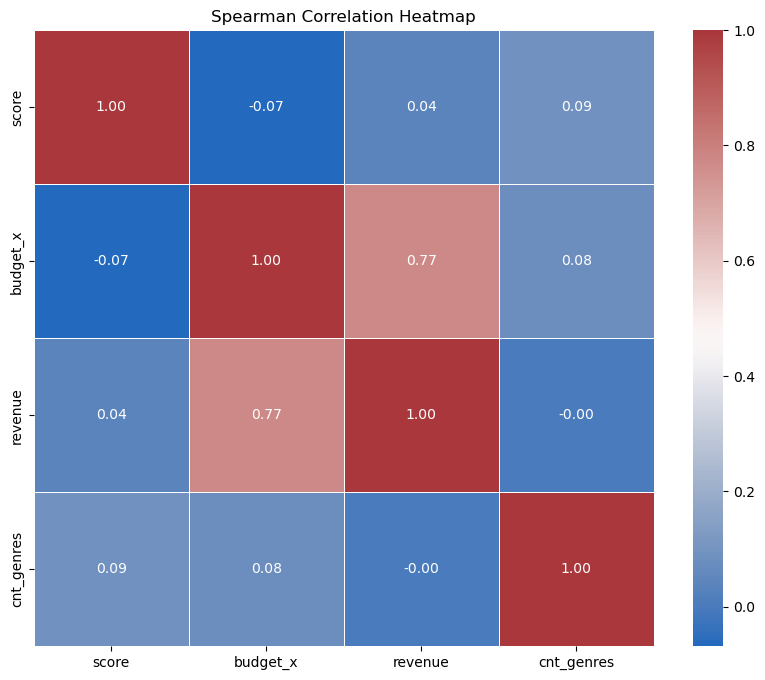

In [ ]:
# Numerical features correlation analysis using spearman
correlation_matrix_spearman = df[nums].corr(method='spearman')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='vlag', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

Only revenue and budget that have correlation with one another.

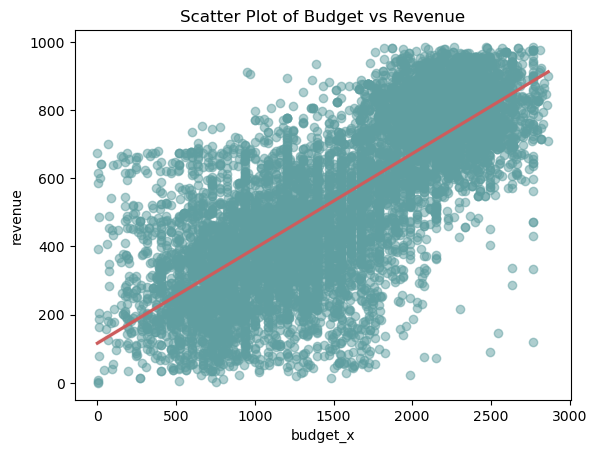

In [ ]:
sns.regplot(x = 'budget_x', y = 'revenue', data = df,
           scatter_kws = {"color": "cadetblue", "alpha": 0.5},
            line_kws = {"color": "indianred"})

plt.title('Scatter Plot of Budget vs Revenue')
plt.tight_layout
plt.show()

The scatter plot analysis reveals a positive correlation between budget and revenue, suggesting that an increase in movie budget is associated with a corresponding increase in revenue.

## Numerical and Category Features using ANOVA

ANOVA (Analysis of Variance) is used to test the differences in means among multiple groups or categories. It is employed to assess if there are significant variations in a numerical variable across different categories within a categorical variable. In this context, ANOVA helps test the correlation or association between numerical and categorical variables.

* H0: Features does not have correlation with one another
* Ha: Features have correlation with one another

We can see whether the features have correlation with one another by seeing the P-Value.

α = 0.05

If:
* P-Value < α: H0 is rejected
* P-Value > α: H0 is accepted

If the p-value is less than or equal to 0.05, we reject the null hypothesis. This suggests that there is enough evidence to conclude that there are significant differences in the means of the numerical variable across the categories of the categorical variable.

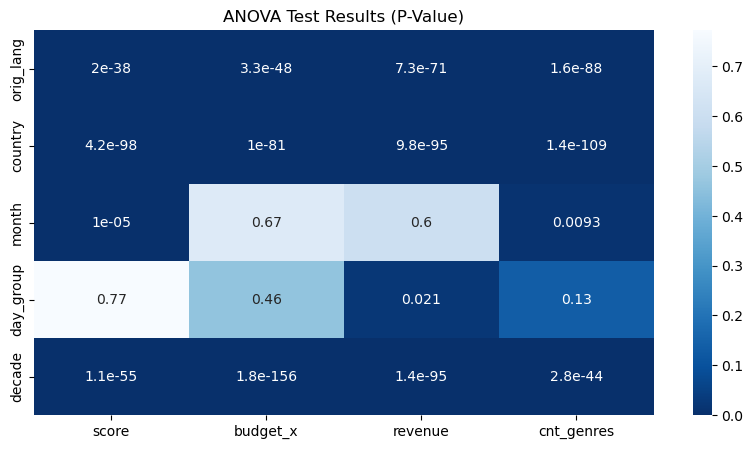

In [ ]:
from scipy.stats import f_oneway
import seaborn as sns

anova_results = {}

# Create an empty DataFrame to store the p-values
p_values_df = pd.DataFrame(index=cats, columns=nums, dtype=np.float64)

# Loop through each numerical feature
for num_feat in nums:
    groups = []

    # Nested loop through each categorical feature
    for cat_feat in cats:
        # Create a list of group data for each category in the categorical feature
        group_data = [df[num_feat][df[cat_feat] == category] for category in df[cat_feat].unique()]

        # Perform one-way ANOVA and store the result
        F, p = f_oneway(*group_data)

        # Store the p-value in the DataFrame
        p_values_df.loc[cat_feat, num_feat] = p

# Plot the p-values as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(p_values_df.astype(float), cmap='Blues_r', annot=True)
plt.title('ANOVA Test Results (P-Value)')
plt.show()

### Language and Score

In [ ]:
from numpy import mean, var
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['score'], df['orig_lang'])

# Perform Tukey's HSD test
result = mc.tukeyhsd()

# Get the residuals for calculating pooled standard deviation
residuals = df['score'] - result.meandiffs[df['orig_lang'].apply(lambda x: result.groupsunique.tolist().index(x))]

# Calculate pooled standard deviation for Cohen's d
pooled_std = np.std(residuals)

# Iterate through each pair of groups and calculate Cohen's d
for i in range(len(result.groupsunique)):
    for j in range(i + 1, len(result.groupsunique)):
        group1 = result.groupsunique[i]
        group2 = result.groupsunique[j]

        # Filter data for the two groups
        data_group1 = df[df['orig_lang'] == group1]['score']
        data_group2 = df[df['orig_lang'] == group2]['score']

        # Calculate Cohen's d
        d = (np.mean(data_group1) - np.mean(data_group2)) / pooled_std
        print(f"{group1} vs. {group2}: Cohen's d = {d:.4f}")

 English vs.  French: Cohen's d = -0.0847
 English vs.  Japanese: Cohen's d = -0.5287
 English vs.  Korean: Cohen's d = 0.0718
 English vs.  Spanish, Castilian: Cohen's d = -0.1831
 English vs. Others: Cohen's d = -0.0195
 French vs.  Japanese: Cohen's d = -0.4440
 French vs.  Korean: Cohen's d = 0.1565
 French vs.  Spanish, Castilian: Cohen's d = -0.0984
 French vs. Others: Cohen's d = 0.0652
 Japanese vs.  Korean: Cohen's d = 0.6005
 Japanese vs.  Spanish, Castilian: Cohen's d = 0.3456
 Japanese vs. Others: Cohen's d = 0.5092
 Korean vs.  Spanish, Castilian: Cohen's d = -0.2549
 Korean vs. Others: Cohen's d = -0.0913
 Spanish, Castilian vs. Others: Cohen's d = 0.1636


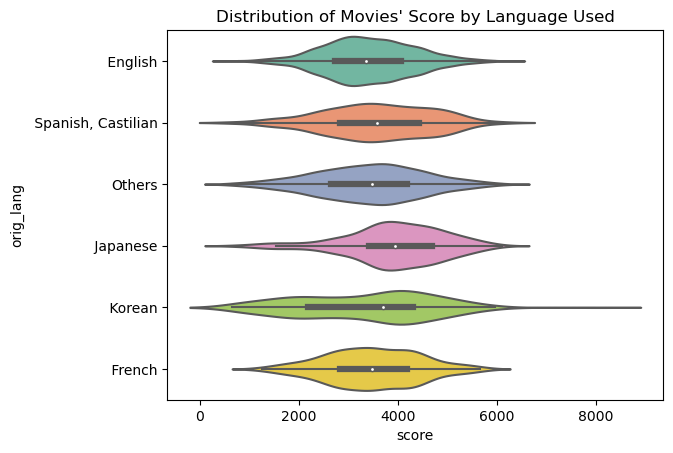

In [ ]:
sns.violinplot(x='score', y='orig_lang', data=df, palette='Set2')

plt.title("Distribution of Movies' Score by Language Used")
plt.show()

The Cohen's d values and the violin plot consistently demonstrate that Japanese language movies exhibit a higher average score compared to films in other languages.

### Country and Score

In [ ]:
mc = MultiComparison(df['score'], df['country'])

# Perform Tukey's HSD test
result = mc.tukeyhsd()

# Get the residuals for calculating pooled standard deviation
residuals = df['score'] - result.meandiffs[df['country'].apply(lambda x: result.groupsunique.tolist().index(x))]

# Calculate pooled standard deviation for Cohen's d
pooled_std = np.std(residuals)

# Iterate through each pair of groups and calculate Cohen's d
for i in range(len(result.groupsunique)):
    for j in range(i + 1, len(result.groupsunique)):
        group1 = result.groupsunique[i]
        group2 = result.groupsunique[j]

        # Filter data for the two groups
        data_group1 = df[df['country'] == group1]['score']
        data_group2 = df[df['country'] == group2]['score']

        # Calculate Cohen's d
        d = (np.mean(data_group1) - np.mean(data_group2)) / pooled_std
        print(f"{group1} vs. {group2}: Cohen's d = {d:.4f}")

AU vs. FR: Cohen's d = 0.2286
AU vs. JP: Cohen's d = -0.1350
AU vs. KR: Cohen's d = 0.3619
AU vs. Others: Cohen's d = 0.3001
AU vs. US: Cohen's d = 0.4194
FR vs. JP: Cohen's d = -0.3636
FR vs. KR: Cohen's d = 0.1332
FR vs. Others: Cohen's d = 0.0715
FR vs. US: Cohen's d = 0.1908
JP vs. KR: Cohen's d = 0.4968
JP vs. Others: Cohen's d = 0.4351
JP vs. US: Cohen's d = 0.5544
KR vs. Others: Cohen's d = -0.0618
KR vs. US: Cohen's d = 0.0576
Others vs. US: Cohen's d = 0.1193


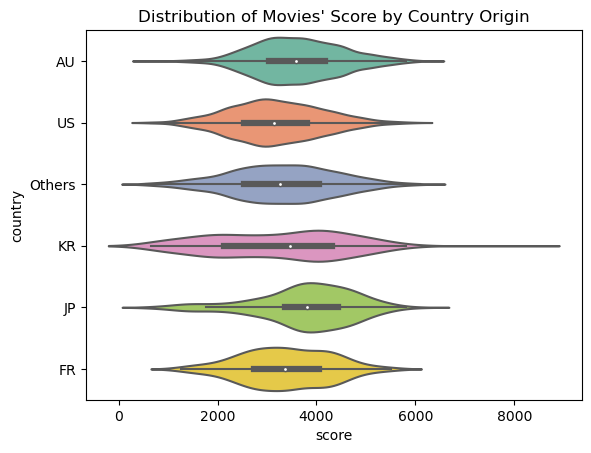

In [ ]:
sns.violinplot(x='score', y='country', data=df, palette='Set2')

plt.title("Distribution of Movies' Score by Country Origin")
plt.show()

Consistent with the findings from the language vs. score analysis, Japanese movies consistently achieve a higher average score than those in other languages. Additionally, this analysis reveals Australia securing the second position in terms of average scores after Japan.

### Country and Budget

In [ ]:
mc = MultiComparison(df['budget_x'], df['country'])

# Perform Tukey's HSD test
result = mc.tukeyhsd()

# Get the residuals for calculating pooled standard deviation
residuals = df['budget_x'] - result.meandiffs[df['country'].apply(lambda x: result.groupsunique.tolist().index(x))]

# Calculate pooled standard deviation for Cohen's d
pooled_std = np.std(residuals)

# Iterate through each pair of groups and calculate Cohen's d
for i in range(len(result.groupsunique)):
    for j in range(i + 1, len(result.groupsunique)):
        group1 = result.groupsunique[i]
        group2 = result.groupsunique[j]

        # Filter data for the two groups
        data_group1 = df[df['country'] == group1]['budget_x']
        data_group2 = df[df['country'] == group2]['budget_x']

        # Calculate Cohen's d
        d = (np.mean(data_group1) - np.mean(data_group2)) / pooled_std
        print(f"{group1} vs. {group2}: Cohen's d = {d:.4f}")

AU vs. FR: Cohen's d = -0.2655
AU vs. JP: Cohen's d = -0.7124
AU vs. KR: Cohen's d = -0.5366
AU vs. Others: Cohen's d = -0.3894
AU vs. US: Cohen's d = -0.1488
FR vs. JP: Cohen's d = -0.4469
FR vs. KR: Cohen's d = -0.2711
FR vs. Others: Cohen's d = -0.1239
FR vs. US: Cohen's d = 0.1167
JP vs. KR: Cohen's d = 0.1757
JP vs. Others: Cohen's d = 0.3230
JP vs. US: Cohen's d = 0.5635
KR vs. Others: Cohen's d = 0.1473
KR vs. US: Cohen's d = 0.3878
Others vs. US: Cohen's d = 0.2405


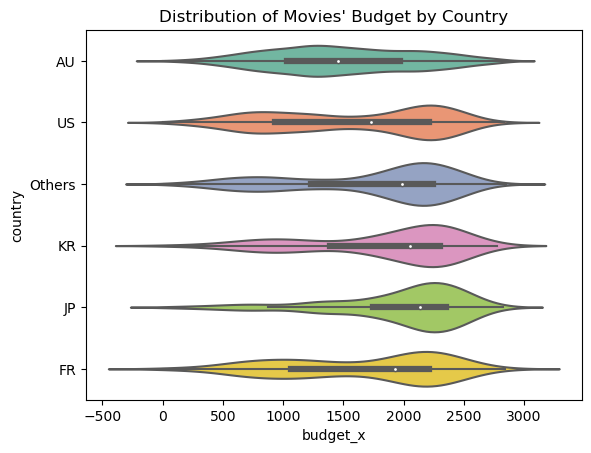

In [ ]:
sns.violinplot(x='budget_x', y='country', data=df, palette='Set2')

plt.title("Distribution of Movies' Budget by Country")
plt.show()

In this examination of the relationship between movie budgets and country of origin, Japanese films consistently exhibit a higher average budget compared to movies from other countries. Following closely are Korean films in the second position and Australian films in the third position.

### Country and Revenue

In [ ]:
mc = MultiComparison(df['revenue'], df['country'])

# Perform Tukey's HSD test
result = mc.tukeyhsd()

# Get the residuals for calculating pooled standard deviation
residuals = df['revenue'] - result.meandiffs[df['country'].apply(lambda x: result.groupsunique.tolist().index(x))]

# Calculate pooled standard deviation for Cohen's d
pooled_std = np.std(residuals)

# Iterate through each pair of groups and calculate Cohen's d
for i in range(len(result.groupsunique)):
    for j in range(i + 1, len(result.groupsunique)):
        group1 = result.groupsunique[i]
        group2 = result.groupsunique[j]

        # Filter data for the two groups
        data_group1 = df[df['country'] == group1]['revenue']
        data_group2 = df[df['country'] == group2]['revenue']

        # Calculate Cohen's d
        d = (np.mean(data_group1) - np.mean(data_group2)) / pooled_std
        print(f"{group1} vs. {group2}: Cohen's d = {d:.4f}")

AU vs. FR: Cohen's d = -0.2909
AU vs. JP: Cohen's d = -0.6518
AU vs. KR: Cohen's d = -0.6578
AU vs. Others: Cohen's d = -0.4729
AU vs. US: Cohen's d = -0.1763
FR vs. JP: Cohen's d = -0.3609
FR vs. KR: Cohen's d = -0.3669
FR vs. Others: Cohen's d = -0.1820
FR vs. US: Cohen's d = 0.1146
JP vs. KR: Cohen's d = -0.0060
JP vs. Others: Cohen's d = 0.1788
JP vs. US: Cohen's d = 0.4754
KR vs. Others: Cohen's d = 0.1849
KR vs. US: Cohen's d = 0.4815
Others vs. US: Cohen's d = 0.2966


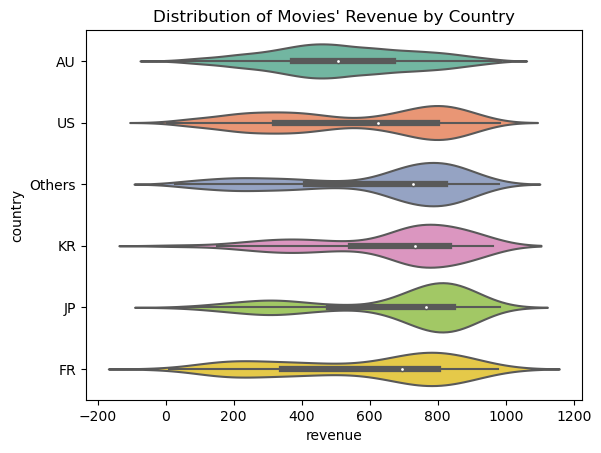

In [ ]:
sns.violinplot(x='revenue', y='country', data=df, palette='Set2')

plt.title("Distribution of Movies' Revenue by Country")
plt.show()

As observed in the earlier analysis of the correlation between movie budgets and revenue, the positive relationship between these variables is reaffirmed in the country-wise analysis. The distribution patterns of budget and revenue exhibit notable similarities. Additionally, the Cohen's d values indicate a relatively consistent impact size between budget and revenue variables across different countries.

## Genre and Score

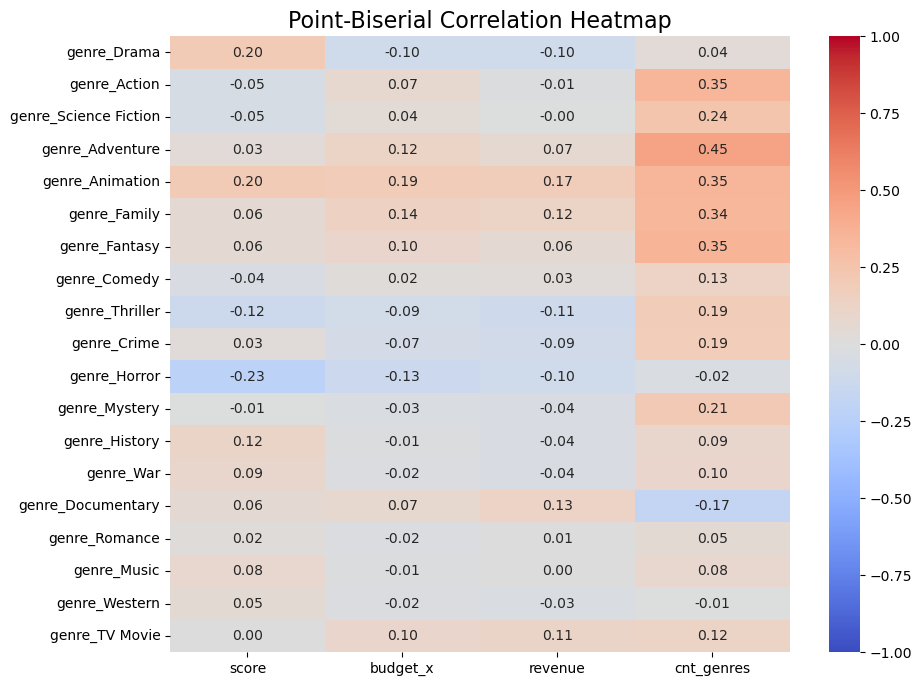

In [ ]:
# Import the necessary library
from scipy.stats import pointbiserialr

# Apply point-biserial correlation on each pair of features in the selected features
correlations = pd.DataFrame(index=nums, columns=binary)

for i in nums:
    for j in binary:
        if i != j:
            correlations.loc[i, j] = pointbiserialr(df[i], df[j])[0]

# Transpose the correlations DataFrame to switch the axes
correlations = correlations.T

# Visualize the correlations through a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations.astype(float), annot=True,  vmin = -1, vmax = 1, cmap="coolwarm", fmt=".2f")
plt.title("Point-Biserial Correlation Heatmap", fontsize=16)
plt.show()

The genres exhibit a low correlation with numerical features. Nevertheless, let's delve into the association between each genre and movie scores.

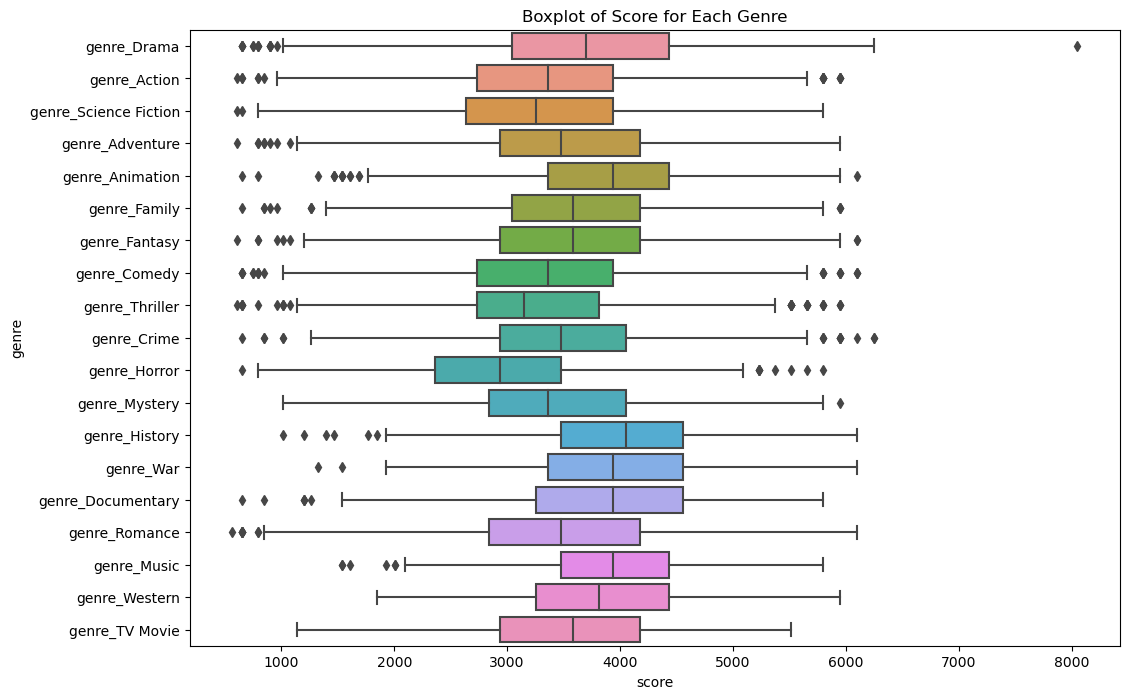

In [ ]:
# Create a new DataFrame with only the relevant columns (genre and score)
relevant_col = ['genre_Drama',
                 'genre_Action',
                 'genre_Science Fiction',
                 'genre_Adventure',
                 'genre_Animation',
                 'genre_Family',
                 'genre_Fantasy',
                 'genre_Comedy',
                 'genre_Thriller',
                 'genre_Crime',
                 'genre_Horror',
                 'genre_Mystery',
                 'genre_History',
                 'genre_War',
                 'genre_Documentary',
                 'genre_Romance',
                 'genre_Music',
                 'genre_Western',
                 'genre_TV Movie',
                 'score']

df_genre_score = df[relevant_col]

# Melt the DataFrame to long format
df_genre_score_melted = pd.melt(df_genre_score, id_vars=['score'], var_name='genre', value_name='value')

# Filter rows where the value is 1
df_genre_score_melted = df_genre_score_melted[df_genre_score_melted['value'] == 1]

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='score', y='genre', data=df_genre_score_melted)
plt.title('Boxplot of Score for Each Genre')
plt.show()

The boxplot reveals that genres such as Drama, Animation, History, War, Documentary, Music, and Western consistently achieve high scores. A notable outlier in the Drama genre suggests the presence of a movie with an exceptionally high score. Additionally, the boxplot highlights that Horror genre movies generally attain lower scores.

# The End :)